In [ ]:
!pip install neuron
!pip install netpyne
import matplotlib
%matplotlib inline

In [ ]:
%matplotlib inline
from netpyne import specs, sim

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters


## Cell parameters
netParams.cellParams['pyr'] = {
    'secs': {
        'soma': {
            'geom': {
                'diam': 18.8,   
                'L': 18.8, 
                'Ra': 123.0},
            'mechs': {
                'hh': {
                    'gnabar': 0.12, 
                    'gkbar': 0.036, 
                    'gl': 0.0003, 
                    'el': -70}
            }
        }
    }
}                


## Population parameters
netParams.popParams['E'] = {
    'cellType': 'pyr', 
    'numCells': 20}

netParams.popParams['I'] = {
    'cellType': 'pyr', 
    'numCells': 20}


## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {
    'mod': 'Exp2Syn', 
    'tau1': 0.1, 
    'tau2': 5.0, 
    'e': 0}  # excitatory synaptic mechanism

netParams.synMechParams['inh'] = {
    'mod': 'Exp2Syn', 
    'tau1': 0.1, 
    'tau2': 5.0, 
    'e': -70}  # inhibitory synaptic mechanism


# Stimulation parameters
netParams.stimSourceParams['bkg'] = {
    'type': 'NetStim', 
    'rate': 50, 
    'noise': 0.5}
    
netParams.stimTargetParams['bkg->E'] = {
    'source': 'bkg', 
    'conds': {'pop': 'E'}, 
    'weight': 0.01, 
    'delay': 5, 
    'synMech': 'exc'}


## Connectivity rules
netParams.connParams['E->I'] = {    #  S -> I label
    'preConds': {'pop': 'E'},       # conditions of presyn cells
    'postConds': {'pop': 'I'},      # conditions of postsyn cells
    'divergence': 5,               # probability of connection
    'weight': 0.01,                 # synaptic weight
    'delay': 5,                     # transmission delay (ms)
    'synMech': 'exc'}               # synaptic mechanism

netParams.connParams['I->E'] = {    #  I -> S label
    'preConds': {'pop': 'I'},       # conditions of presyn cells
    'postConds': {'pop': 'E'},      # conditions of postsyn cells
    'probability': 0.7,               # probability of connection
    'weight': 0.02,                 # synaptic weight
    'delay': 5,                     # transmission delay (ms)
    'synMech': 'inh'}               # synaptic mechanism


# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration

simConfig.duration = 1*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.01                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1          # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'tut_oscillation'  # Set file output name
simConfig.saveJson = False

#simConfig.recordLFP = [[50, 50, 50]]
#simConfig.recordDipole = True

simConfig.analysis['plotTraces'] = {'include': [1], 'saveFig': True}  # Plot recorded traces for this list of cells
simConfig.analysis['plotRaster'] = {'showFig': True}                  # Plot a raster
simConfig.analysis['plotSpikeHist'] = {'include': ['E', 'I'], 'showFig': True}
simConfig.analysis['plotRateSpectrogram'] = {'include': ['all']}


# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)


Preparing LFP data...
Plotting LFP time series...


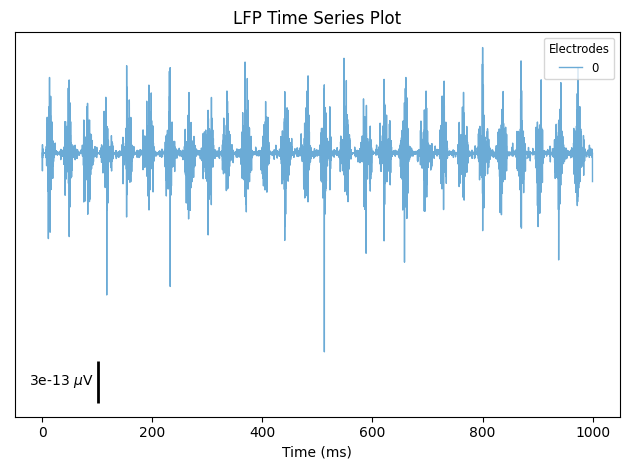

In [26]:
sim.plotting.plotLFPTimeSeries(electrodes=[0])

In [ ]:
sim.plotting.plotLFPSpectrogram(electrodes=[0])

In [ ]:
sim.analysis.plotDipole()

In [ ]:
sim.analysis.plotEEG()

1) Start from netpyne tut_oscillation.py and run all jupyter notebook cells

2) Modify parameters and rerun the model to get different oscillation frequencies

Hint 1: try changing connection parameters (weights, probability, delay, synaptic time constants) and cell biophysics 

Hint 2: if you want the simulation to run faster comment out the `simConfig.recordLFP = [[50, 50, 50]]` and `simConfig.recordDipole = True` lines